In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [117]:
dataset = "rfds_12.csv"
id = "rfd_12"

In [118]:
train_path = '/content/drive/MyDrive/Colab Notebooks/dataset/' + dataset

# Read the dataset
train_df = pd.read_csv(train_path,sep=';',encoding = "ISO-8859-1")

train_df

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,201,202,203,204,205,206,207,208,209,210
0,003el,003el,chile,0,0,2,582,0,Fri Sep 09 14:53:03 +0000 2011,0,...,0.922403,0.890399,0.974638,0.924819,1.000000,1.000000,0.828502,0.944143,1.000000,0.924819
1,ÐÐ°ÑÐ¸Ð»Ð¸Ð¹ ÐÐ²Ð³ÐµÐ½ÑÐµÐ²Ð¸Ñ,70004,?,0,0,3,699,1,Wed Oct 13 12:33:34 +0000 2010,0,...,0.999698,0.987923,1.000000,1.000000,0.999396,1.000000,0.999396,0.999698,0.999698,0.999698
2,gerardo peniche,030590babo,campeche mexico,0,0,6,408,0,Wed Aug 31 07:59:56 +0000 2011,0,...,0.986111,0.998490,0.997283,0.999396,0.988225,0.998490,0.986413,0.995471,0.993659,0.993357
3,mike todd,0412madspell,?,0,0,4,606,0,Sat May 08 00:21:43 +0000 2010,0,...,0.887983,0.950181,0.921800,0.962862,0.866546,0.986715,0.783514,0.908514,0.876812,0.848128
4,maria jose bermudez,192Maria,maturin,0,0,1,543,0,Mon May 16 17:53:54 +0000 2011,0,...,0.997283,0.934783,0.998490,0.998490,0.997585,0.999698,0.995169,0.997283,0.997585,0.996377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9014,Rachel Hayter,_rachelhayter,"Sydney, New South Wales",1,1,1413,2473,42,Tue Apr 07 14:21:03 +0000 2009,3779,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999649,1.000000,1.000000,1.000000,1.000000
9015,Sarah Hancock,_SarahHancock,"Adelaide, South Australia",1,1,943,990,28,Thu Oct 18 01:35:47 +0000 2012,429,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999124,1.000000,1.000000,1.000000,1.000000
9016,Simplykpop,_Simplykpop,?,1,1,329839,242,1279,Mon Feb 27 07:32:00 +0000 2012,23,...,1.000000,1.000000,0.991060,0.999825,0.999649,0.998598,0.999649,1.000000,0.991937,0.992638
9017,Techetechet,_Techetechete,"Roma, Lazio",1,1,4906,153,21,Mon Jun 03 17:50:59 +0000 2013,5932,...,1.000000,0.999649,0.992638,0.999825,0.999825,0.994917,0.999825,0.999825,0.994917,0.995618


In [119]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

Y = label_encoder.fit_transform(train_df["class"])
print(Y)
del train_df["class"]

[0 0 0 ... 1 1 1]


In [120]:
train_df['created_at'] = train_df['created_at'].apply(lambda x: x.split(' ')[1] + " - " + x.split(' ')[5])

train_df

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,201,202,203,204,205,206,207,208,209,210
0,003el,003el,chile,0,0,2,582,0,Sep - 2011,0,...,0.922403,0.890399,0.974638,0.924819,1.000000,1.000000,0.828502,0.944143,1.000000,0.924819
1,ÐÐ°ÑÐ¸Ð»Ð¸Ð¹ ÐÐ²Ð³ÐµÐ½ÑÐµÐ²Ð¸Ñ,70004,?,0,0,3,699,1,Oct - 2010,0,...,0.999698,0.987923,1.000000,1.000000,0.999396,1.000000,0.999396,0.999698,0.999698,0.999698
2,gerardo peniche,030590babo,campeche mexico,0,0,6,408,0,Aug - 2011,0,...,0.986111,0.998490,0.997283,0.999396,0.988225,0.998490,0.986413,0.995471,0.993659,0.993357
3,mike todd,0412madspell,?,0,0,4,606,0,May - 2010,0,...,0.887983,0.950181,0.921800,0.962862,0.866546,0.986715,0.783514,0.908514,0.876812,0.848128
4,maria jose bermudez,192Maria,maturin,0,0,1,543,0,May - 2011,0,...,0.997283,0.934783,0.998490,0.998490,0.997585,0.999698,0.995169,0.997283,0.997585,0.996377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9014,Rachel Hayter,_rachelhayter,"Sydney, New South Wales",1,1,1413,2473,42,Apr - 2009,3779,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999649,1.000000,1.000000,1.000000,1.000000
9015,Sarah Hancock,_SarahHancock,"Adelaide, South Australia",1,1,943,990,28,Oct - 2012,429,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999124,1.000000,1.000000,1.000000,1.000000
9016,Simplykpop,_Simplykpop,?,1,1,329839,242,1279,Feb - 2012,23,...,1.000000,1.000000,0.991060,0.999825,0.999649,0.998598,0.999649,1.000000,0.991937,0.992638
9017,Techetechet,_Techetechete,"Roma, Lazio",1,1,4906,153,21,Jun - 2013,5932,...,1.000000,0.999649,0.992638,0.999825,0.999825,0.994917,0.999825,0.999825,0.994917,0.995618


In [121]:
# Encode labels in column 'species'.
train_df['name'] = label_encoder.fit_transform(train_df['name'])
train_df['screen_name'] = label_encoder.fit_transform(train_df['screen_name'])
train_df['location'] = label_encoder.fit_transform(train_df['location'])
train_df['created_at'] = label_encoder.fit_transform(train_df['created_at'])
train_df['lang'] = label_encoder.fit_transform(train_df['lang'])

train_df

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,201,202,203,204,205,206,207,208,209,210
0,11,0,3390,0,0,2,582,0,137,0,...,0.922403,0.890399,0.974638,0.924819,1.000000,1.000000,0.828502,0.944143,1.000000,0.924819
1,8874,51,91,0,0,3,699,1,125,0,...,0.999698,0.987923,1.000000,1.000000,0.999396,1.000000,0.999396,0.999698,0.999698,0.999698
2,8354,1,3375,0,0,6,408,0,16,0,...,0.986111,0.998490,0.997283,0.999396,0.988225,0.998490,0.986413,0.995471,0.993659,0.993357
3,8612,3,91,0,0,4,606,0,100,0,...,0.887983,0.950181,0.921800,0.962862,0.866546,0.986715,0.783514,0.908514,0.876812,0.848128
4,8571,20,3594,0,0,1,543,0,101,0,...,0.997283,0.934783,0.998490,0.998490,0.997585,0.999698,0.995169,0.997283,0.997585,0.996377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9014,6296,4917,2850,1,1,1413,2473,42,2,3779,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999649,1.000000,1.000000,1.000000,1.000000
9015,6806,4897,161,1,1,943,990,28,127,429,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999124,1.000000,1.000000,1.000000,1.000000
9016,7074,4898,91,1,1,329839,242,1279,41,23,...,1.000000,1.000000,0.991060,0.999825,0.999649,0.998598,0.999649,1.000000,0.991937,0.992638
9017,7411,4899,2513,1,1,4906,153,21,78,5932,...,1.000000,0.999649,0.992638,0.999825,0.999825,0.994917,0.999825,0.999825,0.994917,0.995618


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(train_df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)
x_train

array([[0.84580016, 0.96406787, 0.41295443, ..., 1.        , 1.        ,
        1.        ],
       [0.05506336, 0.03083065, 0.02329749, ..., 0.85810163, 0.87340619,
        0.83807063],
       [0.83649209, 0.49340135, 0.33205325, ..., 1.        , 0.98625307,
        0.98949922],
       ...,
       [0.01570035, 0.04280803, 0.02329749, ..., 1.        , 0.98466689,
        0.98649899],
       [0.24795335, 0.66463347, 0.12544803, ..., 0.50814957, 0.48998179,
        0.41429802],
       [0.57452058, 0.31751137, 0.02329749, ..., 0.99777356, 0.96616141,
        0.96949772]])

In [122]:
x_train, x_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.2, random_state=42)
x_train

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,201,202,203,204,205,206,207,208,209,210
8679,7542,8693,1613,1,1,26675,8696,89,131,17290,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000,1.000000,1.000000
111,491,278,91,0,0,10,434,0,74,0,...,0.945350,0.926027,0.986111,0.984300,0.960145,0.999094,0.926329,0.955314,0.958031,0.943237
8620,7459,4449,1297,0,1,2603,9,26,34,17,...,1.000000,0.999124,0.986854,0.998598,1.000000,0.998247,1.000000,1.000000,0.995443,0.996319
6341,3035,6376,1828,1,1,43862,5556,712,97,2008,...,1.000000,1.000000,1.000000,1.000000,0.999825,0.999299,0.999825,1.000000,1.000000,1.000000
3125,2428,4727,1181,0,0,39,286,0,136,0,...,1.000000,1.000000,0.996679,1.000000,1.000000,0.993357,1.000000,1.000000,0.997886,0.997886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5956,875,91,0,1,1419,3043,25,135,5780,...,0.999474,1.000000,0.996494,0.999825,0.999124,0.999474,0.999124,0.999474,0.996670,0.997195
5191,406,187,569,0,1,816,1806,6,16,623,...,0.999474,0.999474,0.987379,0.999825,0.998598,0.997897,0.998598,0.999124,0.988431,0.989132
5390,140,386,91,0,1,2223,130,7,46,1470,...,1.000000,0.998247,0.993339,0.999124,0.999825,0.996144,0.999825,1.000000,0.994917,0.995267
860,2211,5993,490,0,0,21,552,0,77,0,...,0.774457,0.941425,0.916365,0.959843,0.848430,0.994867,0.814312,0.845109,0.830918,0.794686


In [ ]:
x_test

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,352,353,354,355,356,357,358,359,360,361
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1570,8460,6877,3378,0,0,4,387,0,101,0,...,0.984903,0.983394,0.986715,0.974940,0.988829,0.986715,0.987017,0.968599,0.987017,0.987017
509,866,789,2476,0,1,10,213,0,42,0,...,0.261171,0.222524,0.433575,0.424517,0.425423,0.248490,0.401570,0.432669,0.401570,0.401570
4115,3208,6316,451,0,1,41,105,0,77,5,...,0.997897,0.997897,0.997371,0.997546,0.997371,0.997897,0.998247,0.997721,0.998247,0.998247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,0.239130,0.217089,0.414251,0.404287,0.405193,0.225543,0.401570,0.413647,0.401570,0.401570
4129,7867,6607,91,1,1,41,175,0,28,3,...,0.998773,0.998773,0.997721,0.998598,0.997721,0.998773,0.998773,0.998598,0.998773,0.998773
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1437,3541,2110,2652,0,1,10,230,0,54,0,...,0.261171,0.219203,0.433575,0.424517,0.425423,0.248490,0.401570,0.432669,0.401570,0.401570


In [ ]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [232]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True], # non inserire nel paper
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rfc = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)

grid_search.fit(x_train, y_train)

In [52]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [53]:
grid_search.best_score_

0.9973665973665975

In [54]:
#new train with best hyperparameters
rfc1 = RandomForestClassifier(random_state = 42, bootstrap = True,
                              criterion = 'entropy', 
                              max_depth = 80, 
                              max_features = 3, 
                              min_samples_leaf = 3, 
                              min_samples_split = 8, 
                              n_estimators = 100)

rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=80, max_features=3,
                       min_samples_leaf=3, min_samples_split=8,
                       random_state=42)

In [55]:
y_pred = rfc1.predict(x_test)

In [56]:
print("Accuracy for Random Forest on Test data: ",accuracy_score(y_test, y_pred))

Accuracy for Random Forest on Test data:  0.9977827050997783


In [ ]:
x_train.shape

(7215, 226)

In [ ]:
x_test.shape

(1804, 226)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00      1128

    accuracy                           1.00      1804
   macro avg       1.00      1.00      1.00      1804
weighted avg       1.00      1.00      1.00      1804

[[ 676    0]
 [   0 1128]]


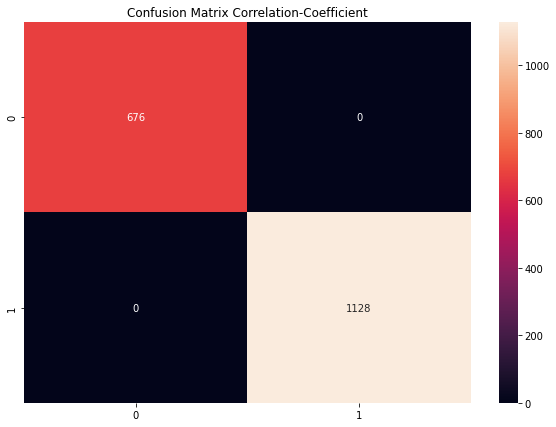

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test1, y_pred))

conf_matrix = confusion_matrix(y_test1, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_rf_" + id + ".pdf")
files.download("roc_curve_rf_" + id + ".pdf") 
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_rf.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'rf',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
#new train with best hyperparameters
dt = DecisionTreeClassifier(random_state=42, max_leaf_nodes = 2, min_samples_split = 2)
dt.fit(x_train, y_train)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
print("Accuracy for Decision Tree on Test data: ",accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_dt" + id + ".pdf")
files.download("roc_curve_dt" + id + ".pdf") 
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_dt.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'dt',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator = nb_classifier, 
                 param_grid = params_NB, 
                 cv = 5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
#new train with best hyperparameters
nb = GaussianNB(var_smoothing=1e-09)
nb.fit(x_train, y_train)

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
print("Accuracy for Gaussian Naive Bayes on Test data: ",accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_nb_" + id + ".pdf")
files.download("roc_curve_nb_" + id + ".pdf") 
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_nb.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'nb',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

In [ ]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 5)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
#new train with best hyperparameters
svc = SVC(C = 10, gamma = 0.0001, kernel = 'rbf')
svc.fit(x_train, y_train)

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
print("Accuracy for SVC on Test data: ",accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_svc_" + id + ".pdf")
files.download("roc_curve_svc_" + id + ".pdf") 
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_svc.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'svc',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lf = LogisticRegression(solver='liblinear')

grid = GridSearchCV(estimator = lf, param_grid = param_grid, scoring = 'accuracy', verbose=3, n_jobs=-1, cv = 5)

grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
#new train with best hyperparameters
lr = LogisticRegression(solver='liblinear', C = 10, penalty = 'l1')
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print("Accuracy for Logistic Regression on Test data: ",accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_lr_" + id + ".pdf")
files.download("roc_curve_lr_" + id + ".pdf") 
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_lr.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'lr',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

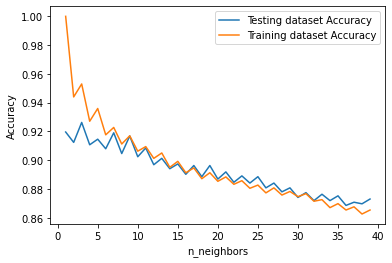

In [ ]:
####### kNN ############
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.inspection import DecisionBoundaryDisplay


neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
##### altro metodo #####
x_train, x_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.2, random_state=1, stratify= Y)

In [ ]:
# PROVA CON K=1 BASELINE
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(x_train_variance,y_train)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(x_test)[0:5]

In [ ]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

In [72]:
# CON TUNING DEI PARAMETRI
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [73]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [74]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9900207900207899

In [76]:
x_train1.shape

(7215, 127)

In [77]:
y_train1.shape

(7215,)

In [78]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, p=1, weights='distance')
# Fit the classifier to the data
knn.fit(x_train1,y_train1)

KNeighborsClassifier(p=1, weights='distance')

In [79]:
y_pred = knn.predict(x_test1)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [80]:
#check accuracy of our model on the test data
print("Accuracy for kNN on Test data: ",accuracy_score(y_test, y_pred))

Accuracy for kNN on Test data:  0.9878048780487805


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       676
           1       0.99      0.99      0.99      1128

    accuracy                           0.99      1804
   macro avg       0.99      0.99      0.99      1804
weighted avg       0.99      0.99      0.99      1804

[[ 660   16]
 [   6 1122]]


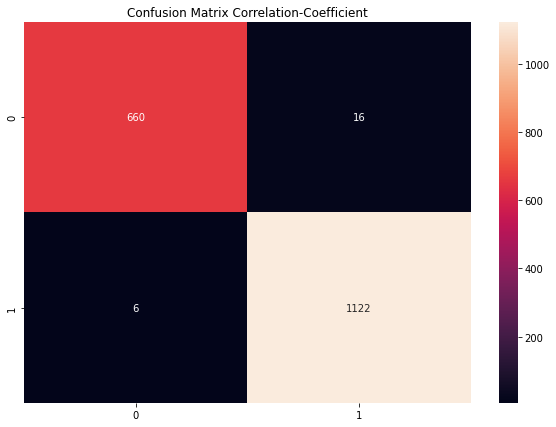

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_nb_" + id + ".pdf")
files.download("roc_curve_nb_" + id + ".pdf") 
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_kNN.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'rf',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

In [65]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 51.0 MB/s 


In [66]:
######## MLP IMPLEMENTATION WITH KERAS ########
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras_tuner as kt

In [206]:
# create model
optimizer =  tf.keras.optimizers.Adam(
    learning_rate= 0.005,
    epsilon = 1e-08
    )
model = Sequential()
model.add(Dense(174, input_dim=174, activation='relu'))
model.add(Dense(174, activation='relu'))
model.add(Dense(174, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 174)               30450     
                                                                 
 dense_37 (Dense)            (None, 174)               30450     
                                                                 
 dense_38 (Dense)            (None, 174)               30450     
                                                                 
 dense_39 (Dense)            (None, 1)                 175       
                                                                 
Total params: 91,525
Trainable params: 91,525
Non-trainable params: 0
_________________________________________________________________


In [207]:
hist = model.fit(x_train_NoCorr5, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
58/58 - 2s - loss: 161.8509 - accuracy: 0.8347 - val_loss: 1.1024 - val_accuracy: 0.9453 - 2s/epoch - 31ms/step
Epoch 2/100
58/58 - 1s - loss: 2.1577 - accuracy: 0.9359 - val_loss: 0.4183 - val_accuracy: 0.9217 - 557ms/epoch - 10ms/step
Epoch 3/100
58/58 - 1s - loss: 0.4054 - accuracy: 0.9563 - val_loss: 0.3451 - val_accuracy: 0.9418 - 508ms/epoch - 9ms/step
Epoch 4/100
58/58 - 0s - loss: 0.6285 - accuracy: 0.9463 - val_loss: 0.4239 - val_accuracy: 0.9286 - 426ms/epoch - 7ms/step
Epoch 5/100
58/58 - 0s - loss: 0.5949 - accuracy: 0.9368 - val_loss: 0.6920 - val_accuracy: 0.8552 - 473ms/epoch - 8ms/step
Epoch 6/100
58/58 - 0s - loss: 0.1841 - accuracy: 0.9560 - val_loss: 1.3903 - val_accuracy: 0.9508 - 444ms/epoch - 8ms/step
Epoch 7/100
58/58 - 0s - loss: 0.1486 - accuracy: 0.9731 - val_loss: 0.1260 - val_accuracy: 0.9737 - 392ms/epoch - 7ms/step
Epoch 8/100
58/58 - 0s - loss: 0.2582 - accuracy: 0.9461 - val_loss: 0.1295 - val_accuracy: 0.9522 - 414ms/epoch - 7ms/step
Epoch 9

In [208]:
best_score = max(hist.history['val_accuracy'])
best_loss = min(hist.history['val_loss'])
print("Best accuracy: ", best_score)
print("Best loss: ", best_loss)

Best accuracy:  0.992376983165741
Best loss:  0.028049398213624954


[]

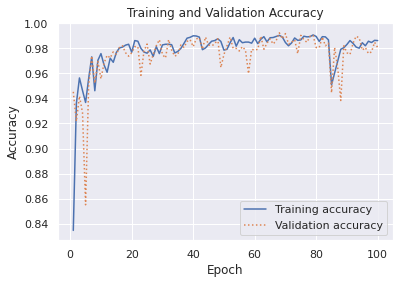

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [210]:
print("Evaluate model on test data")
results = model.evaluate(x_test_NoCorr5, y_test, batch_size=100)
print("test loss, test acc:", results)

Evaluate model on test data
19/19 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9812
test loss, test acc: [0.06766120344400406, 0.9811530113220215]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

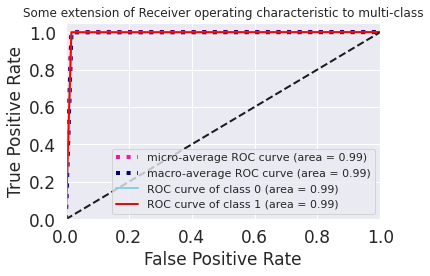

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle, islice
from google.colab import files

#ROC curve
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_nb_" + id + ".pdf")
files.download("roc_curve_nb_" + id + ".pdf") 
plt.show()

In [211]:
p_pred = model.predict(x_test_NoCorr5)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1.   1.   0.   ... 1.   0.   0.99]
[1 1 0 ... 1 0 1]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       676
           1       0.98      0.99      0.98      1128

    accuracy                           0.98      1804
   macro avg       0.98      0.98      0.98      1804
weighted avg       0.98      0.98      0.98      1804

[[ 654   22]
 [  12 1116]]


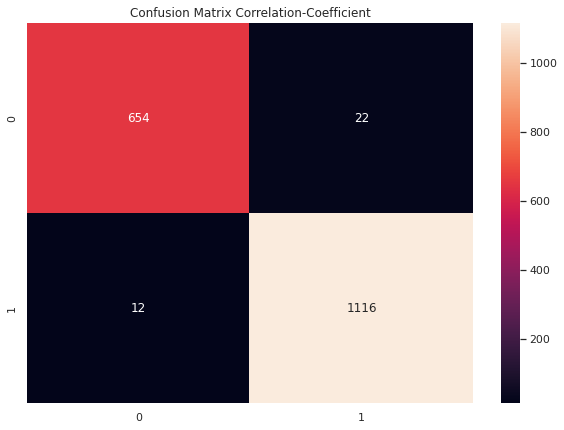

In [212]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

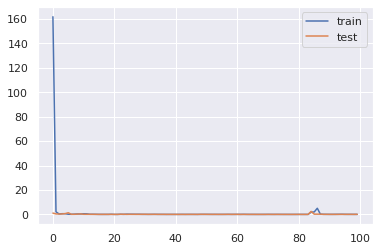

In [213]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
import io, csv

col_names = ['dataset','classifier','target','prediction']

with io.open('/content/drive/MyDrive/Colab Notebooks/dataset/results/' + id + '/results_MLP.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=col_names,delimiter = ";")
    writer.writeheader()

    for x in range(0, len(y_pred)):
      # scrittura nel file csv delle info relative a ciascuna ricetta
      writer.writerow({'dataset': id,
                        'classifier': 'rf',
                        'target': y_test[x],
                        'prediction': y_pred[x],
                        })

In [93]:
## TUNING PARAMS AND RE TRAIN MLP ##
from tensorflow import keras
def model_builder(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(127,)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  model.add(
      Dense(
          # Tune number of units.
          units=hp.Int("units", min_value=32, max_value=512, step=32),
          # Tune the activation function to use.
          activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
  
  # Tune whether to use dropout.
  if hp.Boolean("dropout"):
    model.add(Dropout(rate=0.25))
  
  model.add(Dense(10, activation="softmax"))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 0.005, 0.05, ])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [94]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/dataset/results',
                     project_name='MLP_fakeAccount_FEAT1' + id)

In [95]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train1, y_train1, epochs=50, validation_split=0.3, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.9944573044776917

Best val_accuracy So Far: 0.9944573044776917
Total elapsed time: 00h 02m 23s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.01.



In [96]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 127)               0         
                                                                 
 dense_2 (Dense)             (None, 224)               28672     
                                                                 
 dense_3 (Dense)             (None, 10)                2250      
                                                                 
Total params: 30,922
Trainable params: 30,922
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(x_train1, y_train1, epochs=50, validation_split=0.3)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


158/158 [==============================] - 1s 5ms/step - loss: 19.0431 - accuracy: 0.9547 - val_loss: 26.0442 - val_accuracy: 0.9760
Epoch 2/50
158/158 [==============================] - 0s 3ms/step - loss: 2.7727 - accuracy: 0.9804 - val_loss: 6.3897 - val_accuracy: 0.9834
Epoch 3/50
158/158 [==============================] - 1s 3ms/step - loss: 2.5626 - accuracy: 0.9812 - val_loss: 9.7190 - val_accuracy: 0.9848
Epoch 4/50
158/158 [==============================] - 0s 3ms/step - loss: 1.3934 - accuracy: 0.9764 - val_loss: 1.6084 - val_accuracy: 0.9917
Epoch 5/50
158/158 [==============================] - 1s 3ms/step - loss: 3.3528 - accuracy: 0.9697 - val_loss: 10.2853 - val_accuracy: 0.9714
Epoch 6/50
158/158 [==============================] - 0s 3ms/step - loss: 2.3650 - accuracy: 0.9850 - val_loss: 2.4769 - val_accuracy: 0.9880
Epoch 7/50
158/158 [==============================] - 1s 3ms/step - loss: 0.7969 - accuracy: 0.9855 - val_loss: 4.3928 - val_accuracy: 0.9852
Epoch 8/50
158

In [98]:
#re-istanziazione del modello
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history = hypermodel.fit(x_train1, y_train1, epochs=best_epoch, validation_split=0.3, verbose=2)

Epoch 1/21
158/158 - 1s - loss: 22.4914 - accuracy: 0.9556 - val_loss: 4.9387 - val_accuracy: 0.9848 - 909ms/epoch - 6ms/step
Epoch 2/21
158/158 - 0s - loss: 4.9853 - accuracy: 0.9719 - val_loss: 6.1934 - val_accuracy: 0.9866 - 490ms/epoch - 3ms/step
Epoch 3/21
158/158 - 0s - loss: 4.5792 - accuracy: 0.9836 - val_loss: 11.8791 - val_accuracy: 0.9848 - 444ms/epoch - 3ms/step
Epoch 4/21
158/158 - 0s - loss: 3.8064 - accuracy: 0.9861 - val_loss: 4.7184 - val_accuracy: 0.9931 - 459ms/epoch - 3ms/step
Epoch 5/21
158/158 - 0s - loss: 2.3918 - accuracy: 0.9844 - val_loss: 7.0360 - val_accuracy: 0.9894 - 437ms/epoch - 3ms/step
Epoch 6/21
158/158 - 0s - loss: 3.1004 - accuracy: 0.9796 - val_loss: 7.0359 - val_accuracy: 0.9774 - 415ms/epoch - 3ms/step
Epoch 7/21
158/158 - 0s - loss: 1.6421 - accuracy: 0.9838 - val_loss: 3.6572 - val_accuracy: 0.9898 - 439ms/epoch - 3ms/step
Epoch 8/21
158/158 - 0s - loss: 2.0137 - accuracy: 0.9851 - val_loss: 12.1819 - val_accuracy: 0.9852 - 382ms/epoch - 2ms/st

In [99]:
best_score = max(history.history['val_accuracy'])
best_loss = min(history.history['val_loss'])
print("Best accuracy: ", best_score)
print("Best loss: ", best_loss)

Best accuracy:  0.9935334920883179
Best loss:  3.6571743488311768


In [100]:
eval_result = hypermodel.evaluate(x_test1, y_test1)
print("[test loss, test accuracy]:", eval_result)

57/57 [==============================] - 0s 2ms/step - loss: 1.0545 - accuracy: 0.9861
[test loss, test accuracy]: [1.0544724464416504, 0.9861419200897217]


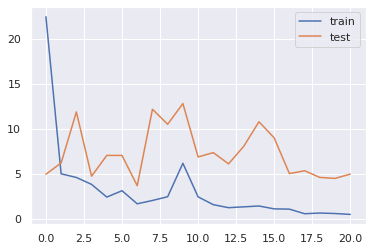

In [101]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [214]:
### ADA BOOST ###
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [215]:
#tuning
ada=AdaBoostClassifier(random_state=42)
search_grid={
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,0.005,0.05,.1]
    }
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)

In [216]:
search.fit(x_train_NoCorr1,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.005, 0.05, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [217]:
search.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000}

In [218]:
search.best_score_

0.9994455994455993

In [219]:
score=np.mean(cross_val_score(ada,x_train_NoCorr1,y_train,scoring='accuracy',cv=5,n_jobs=1))
score

0.9993069993069993

In [223]:
#new train with best hyperparameters
clf = AdaBoostClassifier(random_state = 42,
                              learning_rate = 0.05,
                              n_estimators = 1000)

clf.fit(x_train_NoCorr1, y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=1000, random_state=42)

In [224]:
y_predict = clf.predict(x_test_NoCorr1)

In [225]:
print("Accuracy for AdaBoost on Test data: ",accuracy_score(y_test, y_predict))

Accuracy for AdaBoost on Test data:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00      1128

    accuracy                           1.00      1804
   macro avg       1.00      1.00      1.00      1804
weighted avg       1.00      1.00      1.00      1804

[[ 676    0]
 [   0 1128]]


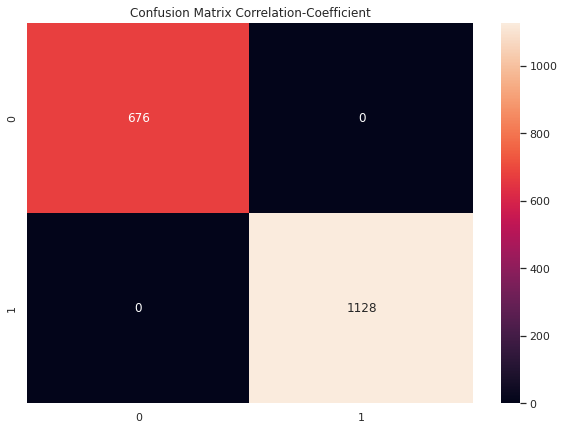

In [226]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_predict))

conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

## FEATURE SELECTION
Non è detto che incrementando il numero di features, l'accuratezza aumenti. Esiste una soglia k, oltra la quale l'accuracy non aumenterà all'aumentare delle features.
Dopo questa soglia k, quando l'accuracy inizia a decrescere con l'aumentare del numero di feature ciò è conosciuto col nome di Curse of Dimensionality.
La Curse of Dimensionality può essere risolta con:
#### 1 PCA, ovvero Dimensionality Reduction che va a modificare o trasformare features in termini di dimensione
#### 2 Feature Selection eslude alcune feature senza modificarle.

tecniche di feature selection: Supervised usabili per labeled data quindi si applicano a modelli supervisionati, Unsupervised usabili per non labeled data.
#### il nostro dataset è labeled quindi useremo le tecniche di tipo Supervised:
#### 1 Filter Methods (Univariate, Multivariate)
#### 2 Wrapper Methods (RFE, GA, Forward/Backward Elimination)
#### 3 Embedded Methods (RFI, LASSO, L1, L2, Elastic Net)


##Filter 
Selezioniamo un sottoinsieme di features basandoci sulla loro relazione con il target. Abbiamo due modi: Metodi statistici e Metodi basati sulla Feature Importance.
Questi metodi selezionano features indipendentemente dal tipo di algoritmo di ML che si utilizzerà.

I metodi di filtering Univariati valutano ogni feature individualmente classificando queste in base a criteri specifici.

Tipi:
#### -Variance Threshold (Remove Constant, Quasi-Constant Features)
#### -Remove Duplicate Features

Altri tipi di Filter Methods:
#### -Correlation Based Methods
#### -Statistical test based (ANOVA, Chi-Square Test, Info Gain/Mutual Info)

*VANTAGGI DEI FILTER METHODS*:
Computazionalmente veloci e scalabili; sono buoni per eliminare feature ridondanti, irrilevanti, duplicate e correlate; non dipendono dal classificatore.

*SVANTAGGI*:
Considerano singole features individualmente (alcune feature sole potrebbero avere poca importanza mo combinate con altre potrebbero essere molto rilevanti).



In [ ]:
# eliminiamo le 15 feature di base in modo da applicare la selezione sulle sole rfds
new_x_train = x_train.drop(x_train.iloc[:, 0:15], axis=1)  
new_x_train

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
8679,1.0,1.0,0.997371,0.677651,1.000000,1.000000,0.999649,1.0,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
111,1.0,1.0,0.993357,0.990036,0.999698,1.000000,0.976751,1.0,0.982186,1.0,...,0.983998,0.983696,0.988225,0.804650,0.987923,0.983696,0.988527,0.812500,0.988527,0.988527
8620,1.0,1.0,0.999825,0.348291,1.000000,0.998072,0.996144,1.0,0.996845,1.0,...,0.999825,0.999825,0.999124,0.999649,0.999124,0.999825,0.999825,0.999649,0.999825,0.999825
6341,1.0,1.0,0.999124,0.677651,1.000000,1.000000,1.000000,1.0,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3125,1.0,1.0,1.000000,0.990036,0.999698,1.000000,0.976751,1.0,0.982186,1.0,...,0.983696,0.983696,0.987923,0.804046,0.987923,0.983696,0.988527,0.804046,0.988527,0.988527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,1.0,0.870289,0.348291,1.000000,1.000000,0.996144,1.0,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5191,1.0,1.0,0.998948,0.348291,1.000000,1.000000,0.990009,1.0,0.999825,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5390,1.0,1.0,0.870289,0.348291,1.000000,0.999474,0.993514,1.0,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
860,1.0,1.0,1.000000,0.990036,0.999698,1.000000,0.976751,1.0,0.982186,1.0,...,0.236715,0.217391,0.817331,0.805857,0.815821,0.223430,0.815821,0.807367,0.815821,0.815821


##PRIMO METODO:
##FILTERING METHOD UNIVARIATO - VARIANCE TRESHOLD
Consiste nell'analizzare singolarmente le Features e classificarle secondo un criterio specifico, in questo caso in base ad una soglia di varianza.
Il metodo consiste nell'analizzare la presenza di: Constant Features, Duplicated Features e Quasi-Constant Features e rimuoverle dai dati di training.
Una soglia di varianza pari a 0 vuol dire che si voglio eliminare le Features (colonne) che contengono il 100% degli elementi uguali, invece utilizzare una soglia dello 0,01 (nel caso dei Quasi-Constant) significherebbe eliminare le colonne in cui il 99% dei valori è simile. 


In [ ]:
## 1 FILTERING METHOD: UNIVARIATE - VARIANCE TRESHOLD
from sklearn.feature_selection import VarianceThreshold
#istanziamo VarianceTreshold che verrà addestrato sul dataset di training con soglia = 0 per identificare le Constant Features attraverso il calcolo della Varianza su ogni colonna
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(new_x_train)

VarianceThreshold(threshold=0)

In [ ]:
#viene visualizzato un array booleani di grandezza pari al numero delle feature, dove ad ogni posizione se il valore è True vuol dire che la feature corrispondente
# è selezionata per essere conservata, viceversa il valore False indica che la feature è una constant feature.
var_thres.get_support()

array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
#diverse RFD generate sono tutte Constant Features

In [ ]:
# in "length" vediamo le feature che si mantengono 
new_x_train.columns[var_thres.get_support()]

Index(['0', '2', '3', '4', '5', '6', '8', '16', '17', '18',
       ...
       '352', '353', '354', '355', '356', '357', '358', '359', '360', '361'],
      dtype='object', length=328)

In [ ]:
#otteniamo il numero di constant feature scorrendo l'array di booleani
constant_columns = [column for column in new_x_train.columns 
                      if column not in new_x_train.columns[var_thres.get_support()]]
print("Numero di Constant Features:",len(constant_columns))

Numero di Constant Features: 34


In [ ]:
#visualizziamo le colonne
print("Constant Features:",constant_columns)

Constant Features: ['1', '7', '9', '10', '11', '12', '13', '14', '15', '22', '24', '25', '26', '27', '43', '50', '52', '53', '54', '55', '57', '64', '66', '67', '68', '69', '71', '79', '80', '81', '82', '83', '89', '116']


In [ ]:
#rimuoviamo le constant feature
new2_x_train = new_x_train.drop(constant_columns,axis=1)

In [ ]:
new2_x_train

,0,2,3,4,5,6,8,16,17,18,...,352,353,354,355,356,357,358,359,360,361
8679,1.0,0.997371,0.677651,1.000000,1.000000,0.999649,1.000000,1.000000,1.000000,0.999299,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
111,1.0,0.993357,0.990036,0.999698,1.000000,0.976751,0.982186,0.999396,0.999396,0.999396,...,0.983998,0.983696,0.988225,0.804650,0.987923,0.983696,0.988527,0.812500,0.988527,0.988527
8620,1.0,0.999825,0.348291,1.000000,0.998072,0.996144,0.996845,1.000000,0.996670,0.999299,...,0.999825,0.999825,0.999124,0.999649,0.999124,0.999825,0.999825,0.999649,0.999825,0.999825
6341,1.0,0.999124,0.677651,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999299,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3125,1.0,1.000000,0.990036,0.999698,1.000000,0.976751,0.982186,1.000000,0.999396,0.999396,...,0.983696,0.983696,0.987923,0.804046,0.987923,0.983696,0.988527,0.804046,0.988527,0.988527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,0.870289,0.348291,1.000000,1.000000,0.996144,1.000000,0.996845,0.996670,0.999299,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5191,1.0,0.998948,0.348291,1.000000,1.000000,0.990009,0.999825,1.000000,0.996670,0.999299,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5390,1.0,0.870289,0.348291,1.000000,0.999474,0.993514,1.000000,0.996845,0.996670,0.999299,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
860,1.0,1.000000,0.990036,0.999698,1.000000,0.976751,0.982186,1.000000,0.999396,0.999396,...,0.236715,0.217391,0.817331,0.805857,0.815821,0.223430,0.815821,0.807367,0.815821,0.815821


In [ ]:
#Ora controlliamo i Duplicati

In [ ]:
#scorriamo il nuovo insieme di feature ottenuto con l'eliminazione delle constant feature e analizziamo se ci sono colonne uguali
duplicated_feat = []
for i in range(0, len(new2_x_train.columns)):
  col_1 = new2_x_train.columns[i]

  for col_2 in new2_x_train.columns[i + 1:]:
    if new2_x_train[col_1].equals(new2_x_train[col_2]):
      duplicated_feat.append(col_2)

#duplicated_feat contiene gli indici delle colonne duplicate

len(duplicated_feat)

121

In [ ]:
duplicated_feat

['36',
 '38',
 '39',
 '40',
 '41',
 '87',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '38',
 '39',
 '40',
 '41',
 '87',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '39',
 '40',
 '41',
 '87',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '40',
 '41',
 '87',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '41',
 '87',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '87',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '86',
 '110',
 '110',
 '90',
 '92',
 '95',
 '98',
 '100',
 '109',
 '92',
 '95',
 '98',
 '100',
 '109',
 '95',
 '98',
 '100',
 '109',
 '98',
 '100',
 '109',
 '100',
 '109',
 '115',
 '109',
 '136',
 '144',
 '180',
 '129',
 '207',
 '207',
 '137',
 '164',
 '159',
 '165',
 '175',
 '144',
 '164',
 '161',
 '206',
 '210',
 '209',
 '211',
 '165',
 '163',
 '201',
 '197',
 '213',
 '210',
 '250',
 '303',
 '247',
 '257',
 '240',
 '288',
 '289',
 '260',
 '272',
 '298',
 '293',
 '300',
 '344',
 '329',
 '349']

In [ ]:
# rimuoviamo le feature duplicate
new3_x_train = new2_x_train.drop(labels=duplicated_feat, axis=1)
print("Total features without Constant and Duplicate Features",new3_x_train.shape)

Total features without Constant and Duplicate Features (7215, 279)


In [ ]:
## ora analizziamo le Quasi-Constant Features
# queste sono feature che hanno tutti i valori nella colonna quasi uguali
# ovviamente in base alla soglia t che si sceglie si può avere una diminuzione maggiore o minore delle feature

In [ ]:
#impostiamo una soglia pari a 0.01, cioè verrano eliminate le colonne che hanno il 99% dei valori uguali

Quasi_filter = VarianceThreshold(threshold=0.01)
x_train_quasi = Quasi_filter.fit_transform(new3_x_train)
print("Non Quasi-Constant:",x_train_quasi.shape)

Non Quasi-Constant: (7215, 38)


In [ ]:
#visualizziamo l'array di booleani
Quasi_filter.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,

In [ ]:
#otteniamo le feature quasi constant
quasi_constant_columns = [column for column in new3_x_train.columns 
                      if column not in new3_x_train.columns[Quasi_filter.get_support()]]
print("Numero di Quasi Constant Features:",len(quasi_constant_columns))

Numero di Quasi Constant Features: 241


In [ ]:
print("Quasi Constant Features:",quasi_constant_columns)

Quasi Constant Features: ['0', '2', '4', '5', '6', '8', '16', '17', '18', '19', '20', '21', '23', '28', '29', '30', '33', '34', '35', '37', '42', '44', '47', '48', '56', '58', '61', '62', '70', '72', '74', '75', '77', '84', '85', '88', '91', '93', '94', '96', '97', '99', '101', '102', '103', '104', '105', '106', '107', '108', '111', '112', '113', '114', '117', '119', '121', '122', '123', '124', '125', '126', '127', '128', '131', '132', '133', '134', '135', '138', '139', '140', '141', '142', '143', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '160', '162', '166', '167', '168', '169', '170', '171', '172', '173', '174', '176', '177', '178', '182', '183', '184', '185', '186', '187', '189', '190', '191', '192', '193', '194', '196', '198', '199', '200', '202', '203', '204', '205', '208', '212', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '232', '233', '234', '235', '236', 

In [ ]:
#rimuoviamo le constant feature
new4_x_train = new3_x_train.drop(quasi_constant_columns,axis=1)

In [ ]:
print("Final Features Selected:",new4_x_train.shape)

Final Features Selected: (7215, 38)


In [ ]:
#ora uniamo le 15 feature di base a quelle ottenute con il metodo di filtering 

x_train_base = x_train.drop(x_train.iloc[:, 15:], axis=1) 
x_train_base

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,statuses_count,lang,default_profile,default_profile_image
8679,7542,8693,1613,1,1,26675,8696,89,131,17290,0,2326,6,1,0
111,491,278,91,0,0,10,434,0,74,0,0,9,6,0,0
8620,7459,4449,1297,0,1,2603,9,26,34,17,0,72,6,0,0
6341,3035,6376,1828,1,1,43862,5556,712,97,2008,1,17030,6,0,0
3125,2428,4727,1181,0,0,39,286,0,136,0,0,266,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5956,875,91,0,1,1419,3043,25,135,5780,0,24510,6,0,0
5191,406,187,569,0,1,816,1806,6,16,623,1,58404,6,0,0
5390,140,386,91,0,1,2223,130,7,46,1470,0,627,6,0,0
860,2211,5993,490,0,0,21,552,0,77,0,0,60,6,1,0


In [ ]:
x_train_variance = pd.concat([x_train_base, new4_x_train], axis=1)
x_train_variance

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,352,353,354,355,356,357,358,359,360,361
8679,7542,8693,1613,1,1,26675,8696,89,131,17290,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
111,491,278,91,0,0,10,434,0,74,0,...,0.983998,0.983696,0.988225,0.804650,0.987923,0.983696,0.988527,0.812500,0.988527,0.988527
8620,7459,4449,1297,0,1,2603,9,26,34,17,...,0.999825,0.999825,0.999124,0.999649,0.999124,0.999825,0.999825,0.999649,0.999825,0.999825
6341,3035,6376,1828,1,1,43862,5556,712,97,2008,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3125,2428,4727,1181,0,0,39,286,0,136,0,...,0.983696,0.983696,0.987923,0.804046,0.987923,0.983696,0.988527,0.804046,0.988527,0.988527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5956,875,91,0,1,1419,3043,25,135,5780,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5191,406,187,569,0,1,816,1806,6,16,623,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5390,140,386,91,0,1,2223,130,7,46,1470,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
860,2211,5993,490,0,0,21,552,0,77,0,...,0.236715,0.217391,0.817331,0.805857,0.815821,0.223430,0.815821,0.807367,0.815821,0.815821


In [ ]:
# dataset ricostruito con le 15 feature di base più le Feature rimanenti al termine dell'operazione di Variance Treshold Filtering

In [ ]:
#grandezza training dataset finale
x_train_variance.shape

(7215, 53)

In [ ]:
#ovviamente per poter valutare il modello le feature devono essere le stesse anche nella parte di dati di test, quindi vanno applicate le drop anche a x_test

In [ ]:
new_x_test = x_test.iloc[:, 15:]
new_x_test

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
3780,1.0,1.0,1.000000,0.348291,0.999649,1.000000,0.986854,1.0,0.998773,1.0,...,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000
7732,1.0,1.0,1.000000,0.348291,1.000000,1.000000,0.994216,1.0,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1570,1.0,1.0,1.000000,0.990036,0.998490,1.000000,0.976751,1.0,0.982186,1.0,...,0.984903,0.983394,0.986715,0.974940,0.988829,0.986715,0.987017,0.968599,0.987017,0.987017
509,1.0,1.0,1.000000,0.979469,0.999698,1.000000,0.976751,1.0,0.982186,1.0,...,0.261171,0.222524,0.433575,0.424517,0.425423,0.248490,0.401570,0.432669,0.401570,0.401570
4115,1.0,1.0,1.000000,0.348291,0.999124,0.999124,0.953199,1.0,0.995443,1.0,...,0.997897,0.997897,0.997371,0.997546,0.997371,0.997897,0.998247,0.997721,0.998247,0.998247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,1.0,1.0,1.000000,0.979469,0.999698,1.000000,0.976751,1.0,0.982186,1.0,...,0.239130,0.217089,0.414251,0.404287,0.405193,0.225543,0.401570,0.413647,0.401570,0.401570
4129,1.0,1.0,0.863804,0.677651,0.998948,0.999474,0.885188,1.0,0.993865,1.0,...,0.998773,0.998773,0.997721,0.998598,0.997721,0.998773,0.998773,0.998598,0.998773,0.998773
7793,1.0,1.0,0.870289,0.348291,1.000000,1.000000,0.999299,1.0,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1437,1.0,1.0,1.000000,0.979469,0.999698,1.000000,0.976751,1.0,0.982186,1.0,...,0.261171,0.219203,0.433575,0.424517,0.425423,0.248490,0.401570,0.432669,0.401570,0.401570


In [ ]:
x_test_variance = x_test.iloc[:, 0:15]
x_test_variance

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,statuses_count,lang,default_profile,default_profile_image
3780,8269,5942,3677,0,1,1798,1876,5,90,37,0,1923,16,1,0
7732,7667,7861,1299,0,1,1351,647,15,7,1645,1,6790,6,1,0
1570,8460,6877,3378,0,0,4,387,0,101,0,0,0,10,0,0
509,866,789,2476,0,1,10,213,0,42,0,0,23,6,1,0
4115,3208,6316,451,0,1,41,105,0,77,5,0,296,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,0,37,6,1,0
4129,7867,6607,91,1,1,41,175,0,28,3,1,205,16,0,0
7793,2925,3467,91,0,1,60303,2982,129,127,11925,0,25488,16,1,0
1437,3541,2110,2652,0,1,10,230,0,54,0,0,23,6,1,0


In [ ]:
new2_x_test = new_x_test.drop(constant_columns,axis=1) # elimino i Constant

In [ ]:
new3_x_test = new2_x_test.drop(labels=duplicated_feat, axis=1) # elimino i duplicati

In [ ]:
new4_x_test = new3_x_test.drop(quasi_constant_columns,axis=1) # elimino i Quasi-Constant
new4_x_test.shape

(1804, 38)

In [ ]:
x_test_variance = pd.concat([x_test_variance, new4_x_test], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_test_variance

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,352,353,354,355,356,357,358,359,360,361
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1570,8460,6877,3378,0,0,4,387,0,101,0,...,0.984903,0.983394,0.986715,0.974940,0.988829,0.986715,0.987017,0.968599,0.987017,0.987017
509,866,789,2476,0,1,10,213,0,42,0,...,0.261171,0.222524,0.433575,0.424517,0.425423,0.248490,0.401570,0.432669,0.401570,0.401570
4115,3208,6316,451,0,1,41,105,0,77,5,...,0.997897,0.997897,0.997371,0.997546,0.997371,0.997897,0.998247,0.997721,0.998247,0.998247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,0.239130,0.217089,0.414251,0.404287,0.405193,0.225543,0.401570,0.413647,0.401570,0.401570
4129,7867,6607,91,1,1,41,175,0,28,3,...,0.998773,0.998773,0.997721,0.998598,0.997721,0.998773,0.998773,0.998598,0.998773,0.998773
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1437,3541,2110,2652,0,1,10,230,0,54,0,...,0.261171,0.219203,0.433575,0.424517,0.425423,0.248490,0.401570,0.432669,0.401570,0.401570


In [ ]:
# Parte di riesecuzione dei modelli e valutazione della performance

#Di seguito sono state riportate seplicemente delle celle copiate. Questo passo consiste semplicemente nel riaddestrare i modelli andando
#a sostituire il dataset di training ed eseguire le prediction sul nuovo dataset di testing

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
import datetime
import matplotlib.pyplot as plt

In [ ]:
#tuning
ada=AdaBoostClassifier(random_state=42)
search_grid={
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,0.005,0.05,.1]
    }
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)

In [ ]:
search.fit(x_train_variance,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.005, 0.05, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [ ]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [ ]:
search.best_score_

0.9998613998613998

In [ ]:
score = np.mean(cross_val_score(ada, x_train_variance, y_train, scoring='accuracy', cv=5, n_jobs=1))
score

0.9997227997227996

In [ ]:
start = datetime.datetime.now()
#new train with best hyperparameters
clf = AdaBoostClassifier(random_state = 42,
                              learning_rate = 0.01,
                              n_estimators = 1000)

clf.fit(x_train_variance, y_train)
end = datetime.datetime.now()

In [ ]:
y_predict = clf.predict(x_test_variance)

In [ ]:
print("Accuracy for AdaBoost on Test data: ",accuracy_score(y_test, y_predict))

Accuracy for AdaBoost on Test data:  1.0


In [ ]:
print("Execution time:", end-start)

Execution time: 0:00:50.182029


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00      1128

    accuracy                           1.00      1804
   macro avg       1.00      1.00      1.00      1804
weighted avg       1.00      1.00      1.00      1804

[[ 676    0]
 [   0 1128]]


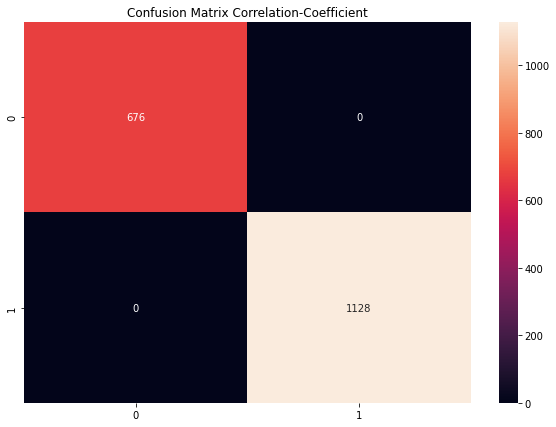

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_predict))

conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

##SECONDO METODO:
##FILTERING METHOD - CORRELATION BASED METHOD
Consiste nel rimuovere le features che sono altamente correlate. 
Se feature indipendenti sono altamente correlate con la variabile dipendente y allora queste non necessitano di essere rimosse; invece, se feature indipendenti sono altamente correlate con altre variabili indipendenti per l'80% o 90% allora possiamo rimuovere queste features ed allenare il modello sulle rimanenti.
Per questo metodo utilizzeremo la correlation matrix che viene calcolata con l'indice di correlazione di Pearson's, che per il nostro task risulta essere applicabile.

In [123]:
#rimuoviamo sempre le 15 feature di base da training e testing set
x_train_corr = x_train.drop(x_train.iloc[:, 0:15], axis=1) 
x_train_corr

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
8679,0.826468,0.428571,0.872042,0.295004,0.295004,0.999474,0.992989,0.873795,0.959159,0.845749,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999825,1.000000,1.000000,1.000000,1.000000
111,0.901268,0.783514,0.707126,0.545894,0.545894,0.577597,0.989130,0.545894,0.545894,0.951691,...,0.945350,0.926027,0.986111,0.984300,0.960145,0.999094,0.926329,0.955314,0.958031,0.943237
8620,0.644347,0.809816,0.533918,0.404382,0.404382,0.998773,0.960561,0.829798,0.889571,0.875197,...,1.000000,0.999124,0.986854,0.998598,1.000000,0.998247,1.000000,1.000000,0.995443,0.996319
6341,0.596144,0.381069,0.942857,0.322875,0.322875,0.999474,0.992989,0.876950,0.953725,0.613497,...,1.000000,1.000000,1.000000,1.000000,0.999825,0.999299,0.999825,1.000000,1.000000,1.000000
3125,0.697162,0.636473,0.997283,0.545290,0.545290,0.971316,0.964070,0.545290,0.545290,0.748792,...,1.000000,1.000000,0.996679,1.000000,1.000000,0.993357,1.000000,1.000000,0.997886,0.997886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.590535,0.397897,0.568799,0.341981,0.341981,0.998422,0.991762,0.786328,0.954777,0.613146,...,0.999474,1.000000,0.996494,0.999825,0.999124,0.999474,0.999124,0.999474,0.996670,0.997195
5191,0.654689,0.537248,0.605259,0.479755,0.479755,0.998247,0.996144,0.763541,0.970727,0.679053,...,0.999474,0.999474,0.987379,0.999825,0.998598,0.997897,0.998598,0.999124,0.988431,0.989132
5390,0.731814,0.536722,0.615425,0.392989,0.392989,0.998948,0.971253,0.704996,0.963015,0.766696,...,1.000000,0.998247,0.993339,0.999124,0.999825,0.996144,0.999825,1.000000,0.994917,0.995267
860,0.821558,0.851449,0.782307,0.707729,0.707729,0.867452,0.987017,0.707729,0.707729,0.903382,...,0.774457,0.941425,0.916365,0.959843,0.848430,0.994867,0.814312,0.845109,0.830918,0.794686


In [124]:
x_test_corr = x_test.drop(x_test.iloc[:, 0:15], axis=1)
x_test_corr

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
3780,0.936196,0.878002,0.998598,0.513059,0.513059,0.998948,0.993865,0.775110,0.941104,0.962664,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7732,0.689571,0.483085,0.929010,0.374759,0.374759,0.999474,0.987730,0.735145,0.958808,0.717090,...,1.000000,0.999825,0.999649,1.000000,1.000000,0.997721,1.000000,1.000000,0.999649,0.999649
1570,0.565821,0.854469,1.000000,0.400060,0.400060,0.617150,0.979469,0.400060,0.400060,0.884360,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
509,0.642814,0.852959,0.998792,0.463164,0.463164,0.559179,0.984903,0.463164,0.463164,0.896437,...,0.998490,0.999698,0.999698,0.999698,0.999396,1.000000,0.998792,0.999396,0.999396,0.999094
4115,0.618931,0.530762,0.791586,0.472743,0.472743,0.976337,0.972656,0.472743,0.890447,0.652936,...,0.993865,0.998422,0.974408,0.998948,0.986328,0.982121,0.988606,0.993865,0.972130,0.975110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.834843,0.743961,0.724940,0.611413,0.611413,0.741546,0.990942,0.611413,0.611413,0.882850,...,0.821860,0.858696,0.973128,0.922705,0.865338,0.999396,0.787138,0.841184,0.894626,0.817935
4129,0.887117,0.468712,0.626117,0.407187,0.407187,0.973532,0.974408,0.407187,0.879404,0.897809,...,0.994566,0.997371,0.985276,0.998948,0.989308,0.996670,0.988957,0.995092,0.983348,0.984224
7793,0.958282,0.375110,0.565118,0.314110,0.314110,0.999649,0.991937,0.891148,0.960736,0.960210,...,1.000000,0.999649,0.997897,1.000000,1.000000,1.000000,1.000000,1.000000,0.997897,0.997897
1437,0.984903,0.944746,0.751208,0.652476,0.652476,0.682971,0.961957,0.652476,0.652476,0.996679,...,0.983696,0.943841,0.996377,0.995169,0.995169,1.000000,0.989734,0.991546,0.994565,0.989734


In [125]:
#definziamo il metodo che una volta creata la matrice di correlazione va ad analizzarla
#andando ad ottenere le colonne che superano le threshold (inferiori e superiori) di correlazione
#ricordiamo che due feature si dicono altamente correlate se il loro indice è vicino a 1 o -1

def correlation(dataset, up_threshold, low_threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  max=0
  min=0
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (abs(corr_matrix.iloc[i,j]) > up_threshold or abs(corr_matrix.iloc[i,j]) < low_threshold):
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
        if (corr_matrix.iloc[i,j] > max and corr_matrix.iloc[i,j] != 1): max = corr_matrix.iloc[i,j]
        if (corr_matrix.iloc[i,j] < min): min = corr_matrix.iloc[i,j]
  print("max corr:", max)
  print("min corr:", min)
  return col_corr

In [126]:
#in questa fase, considerando che non c'è una linea guida sul come settare le soglie di correlazione
#sono state applicate 5 soglie: 0.5, 0.6, 0.7, 0.8, 0.9
#quindi per ogni modello si eseguiranno 5 addestramenti sulla base delle feature ottenute con queste soglie
#e verranno memorizzati i risultati del modello migliore

#visualizziamo il numero di feature correlate ottenuto con le varie soglie, queste sono le 
#feature che dovranno essere eliminate
corr_features1 = correlation(x_train_corr, 0.5, -0.5)
print("correlated features: ", len(corr_features1))

max corr: 0.9745748379118618
min corr: -0.9202603738128252
correlated features:  108


In [127]:
corr_features2 = correlation(x_train_corr, 0.6, -0.6)
print("correlated features: ", len(corr_features2))

max corr: 0.9745748379118618
min corr: -0.9202603738128252
correlated features:  104


In [128]:
corr_features3 = correlation(x_train_corr, 0.7, -0.7)
print("correlated features: ", len(corr_features3))

max corr: 0.9745748379118618
min corr: -0.9202603738128252
correlated features:  95


In [129]:
corr_features4 = correlation(x_train_corr, 0.8, -0.8)
print("correlated features: ", len(corr_features4))

max corr: 0.9745748379118618
min corr: -0.9202603738128252
correlated features:  84


In [130]:
corr_features5 = correlation(x_train_corr, 0.9, -0.9)
print("correlated features: ", len(corr_features5))

max corr: 0.9745748379118618
min corr: -0.9202603738128252
correlated features:  52


In [131]:
x_test_base = x_test.iloc[:, 0:15]
x_test_base

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,statuses_count,lang,default_profile,default_profile_image
3780,8269,5942,3677,0,1,1798,1876,5,90,37,0,1923,16,1,0
7732,7667,7861,1299,0,1,1351,647,15,7,1645,1,6790,6,1,0
1570,8460,6877,3378,0,0,4,387,0,101,0,0,0,10,0,0
509,866,789,2476,0,1,10,213,0,42,0,0,23,6,1,0
4115,3208,6316,451,0,1,41,105,0,77,5,0,296,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,0,37,6,1,0
4129,7867,6607,91,1,1,41,175,0,28,3,1,205,16,0,0
7793,2925,3467,91,0,1,60303,2982,129,127,11925,0,25488,16,1,0
1437,3541,2110,2652,0,1,10,230,0,54,0,0,23,6,1,0


In [132]:
x_train_base = x_train.iloc[:, 0:15]
x_train_base

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,statuses_count,lang,default_profile,default_profile_image
8679,7542,8693,1613,1,1,26675,8696,89,131,17290,0,2326,6,1,0
111,491,278,91,0,0,10,434,0,74,0,0,9,6,0,0
8620,7459,4449,1297,0,1,2603,9,26,34,17,0,72,6,0,0
6341,3035,6376,1828,1,1,43862,5556,712,97,2008,1,17030,6,0,0
3125,2428,4727,1181,0,0,39,286,0,136,0,0,266,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5956,875,91,0,1,1419,3043,25,135,5780,0,24510,6,0,0
5191,406,187,569,0,1,816,1806,6,16,623,1,58404,6,0,0
5390,140,386,91,0,1,2223,130,7,46,1470,0,627,6,0,0
860,2211,5993,490,0,0,21,552,0,77,0,0,60,6,1,0


In [133]:
#creiamo quindi 5 combinazioni di training/test set ed andiamo a rieseguire gli addestramenti sui 3 modelli creati


x_train_NoCorr1 = x_train_corr.drop(corr_features1, axis=1)
x_train_NoCorr1 = pd.concat([x_train_base, x_train_NoCorr1], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_train_NoCorr1

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,150,151,152,153,159,162,168,170,172,203
8679,7542,8693,1613,1,1,26675,8696,89,131,17290,...,1.0,1.0,1.0,1.0,1.000000,0.971078,0.998773,1.000000,0.997546,1.000000
111,491,278,91,0,0,10,434,0,74,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999094,0.993056,0.988829,0.986111
8620,7459,4449,1297,0,1,2603,9,26,34,17,...,1.0,1.0,1.0,1.0,0.999299,0.902191,0.994216,0.999649,0.991060,0.986854
6341,3035,6376,1828,1,1,43862,5556,712,97,2008,...,1.0,1.0,1.0,1.0,1.000000,0.969500,0.998773,1.000000,0.997546,1.000000
3125,2428,4727,1181,0,0,39,286,0,136,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999698,1.000000,0.960749,0.996679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5956,875,91,0,1,1419,3043,25,135,5780,...,1.0,1.0,1.0,1.0,0.998598,0.973883,0.998773,1.000000,0.997546,0.996494
5191,406,187,569,0,1,816,1806,6,16,623,...,1.0,1.0,1.0,1.0,0.999299,0.988256,0.998773,1.000000,0.997546,0.987379
5390,140,386,91,0,1,2223,130,7,46,1470,...,1.0,1.0,1.0,1.0,0.999299,0.989658,0.998422,0.999825,0.997371,0.993339
860,2211,5993,490,0,0,21,552,0,77,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.995169,0.990942,0.958635,0.916365


In [134]:
x_test_NoCorr1 = x_test_corr.drop(corr_features1, axis=1)
x_test_NoCorr1 = pd.concat([x_test_base, x_test_NoCorr1], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_test_NoCorr1

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,150,151,152,153,159,162,168,170,172,203
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,1.0,1.0,1.0,1.0,0.998948,0.971954,0.998773,1.000000,0.997546,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,1.0,1.0,1.0,1.0,0.999649,0.978089,0.998773,1.000000,0.997546,0.999649
1570,8460,6877,3378,0,0,4,387,0,101,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.988829,1.000000,0.698973,1.000000
509,866,789,2476,0,1,10,213,0,42,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999094,0.998792,0.977355,0.999698
4115,3208,6316,451,0,1,41,105,0,77,5,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.998247,0.989658,0.995443,0.974408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.997283,0.994263,0.957126,0.973128
4129,7867,6607,91,1,1,41,175,0,28,3,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.998072,0.995793,0.994741,0.985276
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,1.0,1.0,1.0,1.0,0.999825,0.970552,0.998773,1.000000,0.997546,0.997897
1437,3541,2110,2652,0,1,10,230,0,54,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999396,0.997886,0.977355,0.996377


In [135]:
x_train_NoCorr2 = x_train_corr.drop(corr_features2, axis=1)
x_train_NoCorr2 = pd.concat([x_train_base, x_train_NoCorr2], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_train_NoCorr2
x_test_NoCorr2 = x_test_corr.drop(corr_features2, axis=1)
x_test_NoCorr2 = pd.concat([x_test_base, x_test_NoCorr2], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_test_NoCorr2

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,150,151,152,153,159,162,168,170,172,203
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,1.0,1.0,1.0,1.0,0.998948,0.971954,0.998773,1.000000,0.997546,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,1.0,1.0,1.0,1.0,0.999649,0.978089,0.998773,1.000000,0.997546,0.999649
1570,8460,6877,3378,0,0,4,387,0,101,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.988829,1.000000,0.698973,1.000000
509,866,789,2476,0,1,10,213,0,42,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999094,0.998792,0.977355,0.999698
4115,3208,6316,451,0,1,41,105,0,77,5,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.998247,0.989658,0.995443,0.974408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.997283,0.994263,0.957126,0.973128
4129,7867,6607,91,1,1,41,175,0,28,3,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.998072,0.995793,0.994741,0.985276
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,1.0,1.0,1.0,1.0,0.999825,0.970552,0.998773,1.000000,0.997546,0.997897
1437,3541,2110,2652,0,1,10,230,0,54,0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999396,0.997886,0.977355,0.996377


In [136]:
x_train_NoCorr3 = x_train_corr.drop(corr_features3, axis=1)
x_train_NoCorr3 = pd.concat([x_train_base, x_train_NoCorr3], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_train_NoCorr3
x_test_NoCorr3 = x_test_corr.drop(corr_features3, axis=1)
x_test_NoCorr3 = pd.concat([x_test_base, x_test_NoCorr3], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_test_NoCorr3

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,151,152,153,159,162,168,170,172,174,203
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,1.0,1.0,1.0,0.998948,0.971954,0.998773,1.000000,0.997546,1.000000,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,1.0,1.0,1.0,0.999649,0.978089,0.998773,1.000000,0.997546,1.000000,0.999649
1570,8460,6877,3378,0,0,4,387,0,101,0,...,1.0,1.0,1.0,1.000000,1.000000,0.988829,1.000000,0.698973,1.000000,1.000000
509,866,789,2476,0,1,10,213,0,42,0,...,1.0,1.0,1.0,1.000000,1.000000,0.999094,0.998792,0.977355,0.998792,0.999698
4115,3208,6316,451,0,1,41,105,0,77,5,...,1.0,1.0,1.0,1.000000,1.000000,0.998247,0.989658,0.995443,0.984750,0.974408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,1.0,1.0,1.0,1.000000,1.000000,0.997283,0.994263,0.957126,0.656703,0.973128
4129,7867,6607,91,1,1,41,175,0,28,3,...,1.0,1.0,1.0,1.000000,1.000000,0.998072,0.995793,0.994741,0.976161,0.985276
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,1.0,1.0,1.0,0.999825,0.970552,0.998773,1.000000,0.997546,0.999825,0.997897
1437,3541,2110,2652,0,1,10,230,0,54,0,...,1.0,1.0,1.0,1.000000,1.000000,0.999396,0.997886,0.977355,0.766002,0.996377


In [137]:
x_train_NoCorr4 = x_train_corr.drop(corr_features4, axis=1)
x_train_NoCorr4 = pd.concat([x_train_base, x_train_NoCorr4], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_train_NoCorr4
x_test_NoCorr4 = x_test_corr.drop(corr_features4, axis=1)
x_test_NoCorr4 = pd.concat([x_test_base, x_test_NoCorr4], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_test_NoCorr4

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,162,168,170,172,174,177,184,188,189,203
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,0.971954,0.998773,1.000000,0.997546,1.000000,1.000000,1.000000,0.999825,0.999299,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,0.978089,0.998773,1.000000,0.997546,1.000000,0.997721,0.999825,0.995267,0.999474,0.999649
1570,8460,6877,3378,0,0,4,387,0,101,0,...,1.000000,0.988829,1.000000,0.698973,1.000000,1.000000,0.880133,0.997283,0.938708,1.000000
509,866,789,2476,0,1,10,213,0,42,0,...,1.000000,0.999094,0.998792,0.977355,0.998792,0.999094,0.874698,1.000000,0.997283,0.999698
4115,3208,6316,451,0,1,41,105,0,77,5,...,1.000000,0.998247,0.989658,0.995443,0.984750,0.984575,0.981770,0.970903,0.995618,0.974408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,1.000000,0.997283,0.994263,0.957126,0.656703,0.997585,0.680857,0.997283,0.994565,0.973128
4129,7867,6607,91,1,1,41,175,0,28,3,...,1.000000,0.998072,0.995793,0.994741,0.976161,0.997371,0.989132,0.995092,0.998422,0.985276
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,0.970552,0.998773,1.000000,0.997546,0.999825,1.000000,1.000000,0.999825,1.000000,0.997897
1437,3541,2110,2652,0,1,10,230,0,54,0,...,1.000000,0.999396,0.997886,0.977355,0.766002,1.000000,0.983696,1.000000,0.999094,0.996377


In [138]:
x_train_NoCorr5 = x_train_corr.drop(corr_features5, axis=1)
x_train_NoCorr5 = pd.concat([x_train_base, x_train_NoCorr5], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_train_NoCorr5
x_test_NoCorr5 = x_test_corr.drop(corr_features5, axis=1)
x_test_NoCorr5 = pd.concat([x_test_base, x_test_NoCorr5], axis=1) #unisco le 15 featur di base più le RFD selezionate
x_test_NoCorr5

,name,screen_name,location,url,description,followers_count,friends_count,listed_count,created_at,favourites_count,...,187,188,189,195,197,199,200,202,203,209
3780,8269,5942,3677,0,1,1798,1876,5,90,37,...,0.999299,0.999825,0.999299,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7732,7667,7861,1299,0,1,1351,647,15,7,1645,...,0.999124,0.995267,0.999474,1.000000,0.999649,1.000000,0.999825,0.999825,0.999649,0.999649
1570,8460,6877,3378,0,0,4,387,0,101,0,...,0.766304,0.997283,0.938708,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
509,866,789,2476,0,1,10,213,0,42,0,...,0.897947,1.000000,0.997283,0.999698,1.000000,0.998490,1.000000,0.999698,0.999698,0.999396
4115,3208,6316,451,0,1,41,105,0,77,5,...,0.995793,0.970903,0.995618,0.992287,0.993514,0.997546,0.986503,0.998422,0.974408,0.972130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,7632,8374,3356,0,1,19,411,0,77,0,...,0.747283,0.997283,0.994565,0.900060,0.998792,0.905193,0.997886,0.858696,0.973128,0.894626
4129,7867,6607,91,1,1,41,175,0,28,3,...,0.994741,0.995092,0.998422,0.994741,0.997020,0.997897,0.994917,0.997371,0.985276,0.983348
7793,2925,3467,91,0,1,60303,2982,129,127,11925,...,0.999299,0.999825,1.000000,1.000000,1.000000,1.000000,0.999825,0.999649,0.997897,0.997897
1437,3541,2110,2652,0,1,10,230,0,54,0,...,0.890097,1.000000,0.999094,0.992754,1.000000,0.985205,1.000000,0.943841,0.996377,0.994565


In [139]:
#qui possiamo visualizzare le differenze in termini di numero di feature tra i vai dataset di training/testing

print(x_train_NoCorr1.shape)
print(x_test_NoCorr1.shape)

(7215, 118)
(1804, 118)


In [140]:
print(x_train_NoCorr2.shape)
print(x_test_NoCorr2.shape)

(7215, 122)
(1804, 122)


In [141]:
print(x_train_NoCorr3.shape)
print(x_test_NoCorr3.shape)

(7215, 131)
(1804, 131)


In [142]:
print(x_train_NoCorr4.shape)
print(x_test_NoCorr4.shape)

(7215, 142)
(1804, 142)


In [143]:
print(x_train_NoCorr5.shape)
print(x_test_NoCorr5.shape)

(7215, 174)
(1804, 174)


In [30]:
#allo stesso modo questo passo consiste nel rieseguire tutti gli addestramenti con i nuovi insiemi di dati
#e scegliere quindi il modello con il numero di feature che ha portato migliori risultati in terminii di accuracy, precision, recall ecc

#riaddestramento modello knn

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
#use gridsearch to test all values for n_neighbors
knn_gscv1 = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv1.fit(x_train_NoCorr1, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
#use gridsearch to test all values for n_neighbors
knn_gscv2 = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv2.fit(x_train_NoCorr2, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
#use gridsearch to test all values for n_neighbors
knn_gscv3 = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv3.fit(x_train_NoCorr3, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
#use gridsearch to test all values for n_neighbors
knn_gscv4 = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv4.fit(x_train_NoCorr4, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
#use gridsearch to test all values for n_neighbors
knn_gscv5 = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv5.fit(x_train_NoCorr5, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [149]:
print(knn_gscv1.best_params_)
print(knn_gscv1.best_score_)

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.9209979209979211


In [150]:
print(knn_gscv2.best_params_)
print(knn_gscv2.best_score_)

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.9209979209979211


In [151]:
print(knn_gscv3.best_params_)
print(knn_gscv3.best_score_)

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.9212751212751213


In [152]:
print(knn_gscv4.best_params_)
print(knn_gscv4.best_score_)

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.9214137214137214


In [153]:
print(knn_gscv5.best_params_)
print(knn_gscv5.best_score_)

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.9218295218295218


In [154]:
knn_1 = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
knn_1.fit(x_train_NoCorr1, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [155]:
y_pred1 = knn_1.predict(x_test_NoCorr1)
y_pred1

array([1, 1, 0, ..., 1, 0, 1])

In [156]:
knn_2 = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
knn_2.fit(x_train_NoCorr2, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [157]:
y_pred2 = knn_2.predict(x_test_NoCorr2)
y_pred2

array([1, 1, 0, ..., 1, 0, 1])

In [158]:
knn_3 = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
knn_3.fit(x_train_NoCorr3, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [159]:
y_pred3 = knn_3.predict(x_test_NoCorr3)
y_pred3

array([1, 1, 0, ..., 1, 0, 1])

In [160]:
knn_4 = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
knn_4.fit(x_train_NoCorr4, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [161]:
y_pred4 = knn_4.predict(x_test_NoCorr4)
y_pred4

array([1, 1, 0, ..., 1, 0, 1])

In [162]:
knn_5 = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
knn_5.fit(x_train_NoCorr5, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [163]:
y_pred5 = knn_5.predict(x_test_NoCorr5)
y_pred5

array([1, 1, 0, ..., 1, 0, 1])

In [164]:
print("Accuracy for knn_1 on test data: ",accuracy_score(y_test,y_pred1))

Accuracy for knn_1 on test data:  0.9279379157427938


In [165]:
print("Accuracy for knn_2 on test data: ",accuracy_score(y_test,y_pred2))

Accuracy for knn_2 on test data:  0.9284922394678492


In [166]:
print("Accuracy for knn_3 on test data: ",accuracy_score(y_test,y_pred3))

Accuracy for knn_3 on test data:  0.9284922394678492


In [167]:
print("Accuracy for knn_4 on test data: ",accuracy_score(y_test,y_pred4))

Accuracy for knn_4 on test data:  0.9284922394678492


In [168]:
print("Accuracy for knn_5 on test data: ",accuracy_score(y_test,y_pred5))

Accuracy for knn_5 on test data:  0.9290465631929047


              precision    recall  f1-score   support

           0       0.86      0.97      0.91       676
           1       0.98      0.90      0.94      1128

    accuracy                           0.93      1804
   macro avg       0.92      0.94      0.92      1804
weighted avg       0.93      0.93      0.93      1804

[[ 657   19]
 [ 111 1017]]


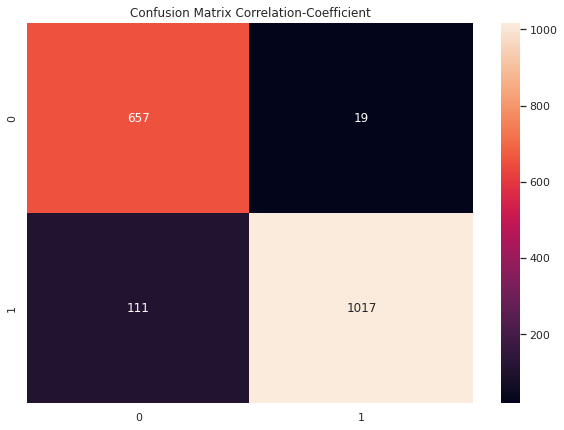

In [169]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred1))

conf_matrix = confusion_matrix(y_test, y_pred1)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       676
           1       0.98      0.90      0.94      1128

    accuracy                           0.93      1804
   macro avg       0.92      0.94      0.93      1804
weighted avg       0.93      0.93      0.93      1804

[[ 657   19]
 [ 110 1018]]


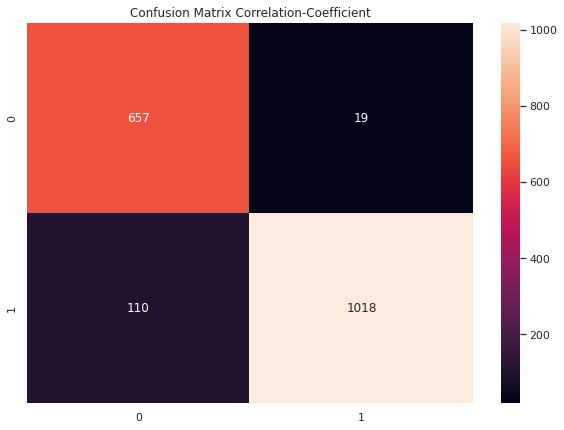

In [170]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred2))

conf_matrix = confusion_matrix(y_test, y_pred2)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       676
           1       0.98      0.90      0.94      1128

    accuracy                           0.93      1804
   macro avg       0.92      0.94      0.93      1804
weighted avg       0.93      0.93      0.93      1804

[[ 657   19]
 [ 110 1018]]


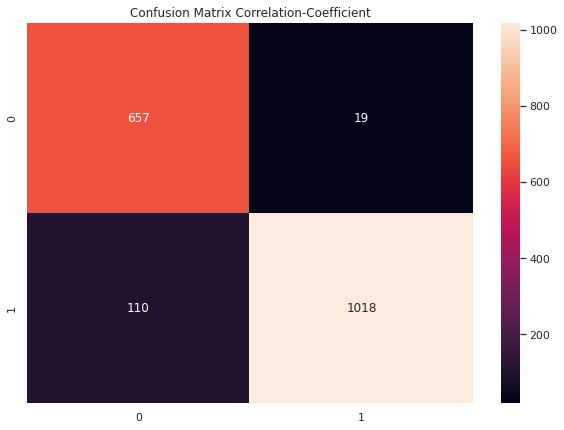

In [171]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred3))

conf_matrix = confusion_matrix(y_test, y_pred3)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       676
           1       0.98      0.90      0.94      1128

    accuracy                           0.93      1804
   macro avg       0.92      0.94      0.93      1804
weighted avg       0.93      0.93      0.93      1804

[[ 657   19]
 [ 110 1018]]


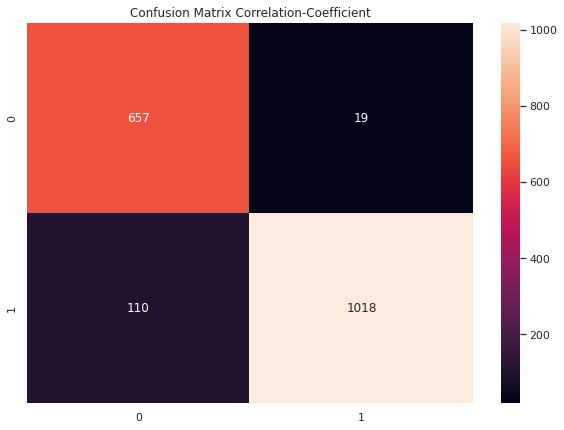

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred4))

conf_matrix = confusion_matrix(y_test, y_pred4)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       676
           1       0.98      0.90      0.94      1128

    accuracy                           0.93      1804
   macro avg       0.92      0.94      0.93      1804
weighted avg       0.94      0.93      0.93      1804

[[ 658   18]
 [ 110 1018]]


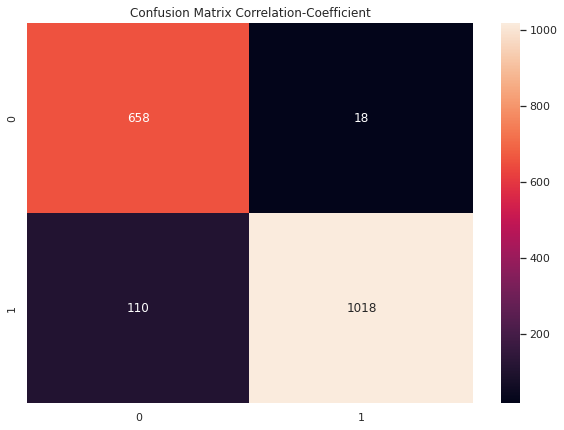

In [173]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred5))

conf_matrix = confusion_matrix(y_test, y_pred5)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt=".0f")
plt.title('Confusion Matrix Correlation-Coefficient')
plt.show()

##TERZO METODO:
##BORUTA METHOD
E' un metodo di feature selection basato su Random Forest. Iterativamente rimuove feature che sono statisticamente meno rilevanti.
Boruta è un metodo basato di feature selection di tipo Wrapper, nello specifico Backward Wrapper, costruito sul modello di classificazione Random Forest. 
Note importanti di Boruta:
1) Assicurarsi di aver riempito missing value prima di eseguire l'algoritmo Boruta.
2) Velocità lenta; in termini di velocità è più lento rispetto ai metodi tradizionali di feature selection.

Metodologia:
1.  Questo metodo prima crea casualità nelle Feature creando feature duplicate e mescolando i valori in ogni colonna. Queste features sono chiamate Funzionalità ombra.
2.  Successivamente addestra un classificatore (Random Forest) sul dataset e calcola l'importanza delle features usando Mean Decrease Accuracy oppure Mean Decrease Gini Impurity. 
3. Successivamente, l'algoritmo controlla ciascuna delle caratteristiche reali se ha un'importanza maggiore. Cioè, se la feature ha un punteggio Z più alto del punteggio Z massimo delle sue feature d'ombra.
4. Ad ogni iterazione, l'algoritmo confronza lo Z score delle copie ombra delle features con le feature originali per vedere se quest'ultime performano meglio dele prime. Se si, l'algoritmo marcherà questa feature come importante.

Essengo costruito con RandomForest Boruta effettua una selezione delle feature migliore con modelli basati su alberi come RF o XGBoost, ma risulta essere un valido metodo di Feature Selection anche per modelli di classificazione come LogisticRegression o SVM.
Una volta ottenuto l'insieme di feature selezionate ovviamente questo può essere applicato a qualsiasi tipo di modello.

Nota: Boruta lavora solo su array NumPy



In [231]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [233]:
#si instanzia un oggetto BorutaPy con il classificatore, si setta n_estimators='auto' cioè determina da solo il numero di stimatori in base alla dimensione del set di dati

from boruta import BorutaPy

feat_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)

In [234]:
rfc1

RandomForestClassifier(random_state=42)

In [ ]:
# converto X prima di fittare il selettore Boruta

In [235]:
x = train_df.to_numpy()

In [237]:
x.shape

(9019, 226)

In [238]:
Y.shape

(9019,)

In [62]:
feat_selector.fit(x,Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	377
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	38
Tentative: 	277
Rejected: 	62
Iteration: 	9 / 100
Confirmed: 	38
Tentative: 	277
Rejected: 	62
Iteration: 	10 / 100
Confirmed: 	38
Tentative: 	277
Rejected: 	62
Iteration: 	11 / 100
Confirmed: 	38
Tentative: 	277
Rejected: 	62
Iteration: 	12 / 100
Confirmed: 	66
Tentative: 	249
Rejected: 	62
Iteration: 	13 / 100
Confirmed: 	66
Tentative: 	249
Rejected: 	62
Iteration: 	14 / 100
Confirmed: 	66
Tentative: 	243
Rejected: 	68
Iteration: 	15 / 100
Confirmed: 	66
Tentative: 	243
Rejected: 	68
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(estimator=RandomForestClassifier(criterion='entropy', max_depth=80,
                                          max_features=3, min_samples_leaf=3,
                                          min_samples_split=8, n_estimators=29,
                                          random_state=RandomState(MT19937) at 0x7F9E085D4AF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F9E085D4AF0, verbose=2)

In [63]:
#array di booleani dove la feature a True è una feature targhetizzata come "importante"
feat_selector.support_

array([False, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [64]:
#le feature selezionate hanno un ranking = 1 mentre le altre hanno un valore che più è alto più l'importanza della feature in questione è bassa
print("Ranking: ", feat_selector.ranking_)

Ranking:  [  6  22  47  47   2   1   1   1  70   1  85   1   2  87 138 111 138  14
   1   2   1   1 138   1 138 138 138 138 138 138 138   9   1   1  93 104
   1 138   2 138 138 138 138 111 138  22   1   1   2   1   1 138   1 138
 138 138 138 108 138   2   1   1   1   2   1 138   1 138 138 138 138 108
 138  66   1   1   1   2   1 138   1 138 138 138 138 138 138   1   1   1
   1   1 138   1 138 138 138 138 138 100 111 108 138   1 138 138  98 138
   1 102 138   1  98 138 103 138   1  92 106   2  96   2  14   1 138 105
 111 101   1  95  98 138   1   1   1   1   2   1   2   2  72  91  41  79
  75   1  58  87  84   1   1   2  89   2   1   2  72  31  77   2   1  86
  69   1   6   1   1   2   1   2   2   1   2   1  81   2   2   1   2  94
  90   1   1   1   1   2   1   1   1   1   2   1   2  58   1   1   1  64
   1   1   1   2   1   1   1   2   1  54  80  77   1  66   3  54   1   1
   1   1   2   1   1  76  82   1  58  83   1   1   1   2   2   2  50   2
   2  14  50   2   2   2  31   2   2  41 

In [65]:
print("No. of significant features: ",feat_selector.n_features_)

No. of significant features:  127


In [ ]:
# features rejected

In [66]:
#possiamo vedere le feature escluse
selected_rf_features = pd.DataFrame({'Feature': list(train_df.columns),'Ranking': feat_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
188,173,1
259,244,1
258,243,1
116,101,1
255,240,1
...,...,...
25,10,138
107,92,138
39,24,138
37,22,138


In [67]:
#si filtra x sulle funzionalità selezionate da BorutaPy
best_features = feat_selector.transform(x)

In [68]:
best_features.shape

(9019, 127)

In [69]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(best_features, Y, test_size=0.2, random_state=42)
x_train1

array([[2.66750000e+04, 8.69600000e+03, 8.90000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+01, 4.34000000e+02, 0.00000000e+00, ...,
        9.87922705e-01, 9.83695652e-01, 9.88526570e-01],
       [2.60300000e+03, 9.00000000e+00, 2.60000000e+01, ...,
        9.99123576e-01, 9.99824715e-01, 9.99824715e-01],
       ...,
       [2.22300000e+03, 1.30000000e+02, 7.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.10000000e+01, 5.52000000e+02, 0.00000000e+00, ...,
        8.15821256e-01, 2.23429952e-01, 8.15821256e-01],
       [1.07100000e+03, 6.43000000e+02, 3.00000000e+00, ...,
        9.99824715e-01, 1.00000000e+00, 1.00000000e+00]])

In [70]:
x_train1.shape, y_train1.shape

((7215, 127), (7215,))

In [71]:
x_test1.shape, y_test1.shape

((1804, 127), (1804,))

In [ ]:
# ora riaddestriamo i modelli sopra cambiando i set di dati